In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

V100=h5py.File('LuminosityFunv100.hdf5', 'r')
V150=h5py.File('LuminosityFunv150.hdf5', 'r')
V200=h5py.File('LuminosityFunv200.hdf5', 'r')

In [12]:
#Define functions that give Luminosity, Magnitude, and MergerTreeWeights. Plug data
def L(name1, name2):
  return [x + y for x, y in zip(np.array(name1['Outputs/Output1/nodeData/spheroidLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000']), np.array(name2['Outputs/Output1/nodeData/diskLuminositiesStellar:JWST_NIRCAM_f277w:observed:z8.0000']))]

#Plug in Luminosity Variable
def M(name):
  for i in range(len(name)):
    if name[i]==0:
       name[i]=0.99999
  return -2.5*np.log10(name) 

#Name 1 is the magnitude, while Name 2 is the general hdf5 file uploaded (i.e. V100)
Magnitude=np.arange(-24,-15,1)
def W(name1, name2):
   Table=pd.DataFrame({'Magnitude':name1, 'MergerTreeWeights':np.array(name2['Outputs/Output1/mergerTreeWeight'])})
   Table['binzz']=pd.cut(Table['Magnitude'], Magnitude)
   resultz=Table.groupby('binzz').agg(
       Sum=('MergerTreeWeights', 'sum')
   ).reset_index()
   return resultz

Magnitude1=[-23.5, -22.5, -21.5, -20.5, -19.5, -18.5, -17.5, -16.5]

In [13]:
#Velocity Outflow
V100L=L(V100, V100)
V100M=M(V100L)
V100W=W(V100M, V100)

V150L=L(V150, V150)
V150M=M(V150L)
V150W=W(V150M, V150)

V200L=L(V200, V200)
V200M=M(V200L)
V200W=W(V200M, V200)

C:\Users\jdpul\AppData\Local\Temp\ipykernel_20268\2955232331.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultz=Table.groupby('binzz').agg(
C:\Users\jdpul\AppData\Local\Temp\ipykernel_20268\2955232331.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultz=Table.groupby('binzz').agg(
C:\Users\jdpul\AppData\Local\Temp\ipykernel_20268\2955232331.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultz=Ta

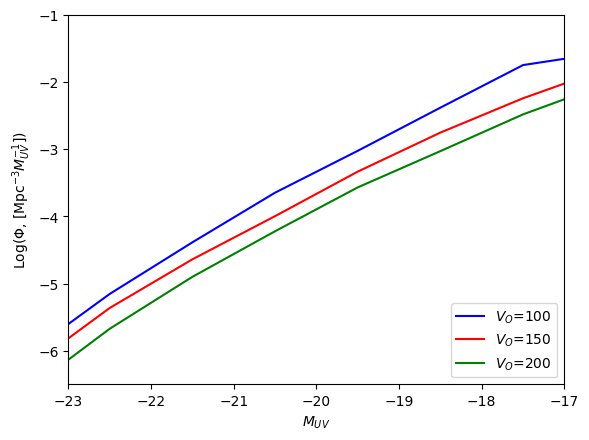

In [29]:
plt.plot(Magnitude1, np.log10(V100W['Sum']), label=r'$V_O$=100', color='b')
plt.plot(Magnitude1, np.log10(V150W['Sum']), label=r'$V_O$=150', color='r')
plt.plot(Magnitude1, np.log10(V200W['Sum']), label=r'$V_O$=200', color='g')
plt.ylim(-6.5, -1)
plt.xlim(-23, -17)
plt.legend(loc='lower right')
plt.xlabel(r'$M_{UV}$') 
plt.ylabel(r"Log($\Phi$, $[{\rm Mpc}^{-3}M_{UV}^{-1}]$)")
plt.savefig("TreyResults1.png")


Text(0, 0.5, 'Log($\\Phi$, $[{\\rm Mpc}^{-3}M_{UV}^{-1}]$)')

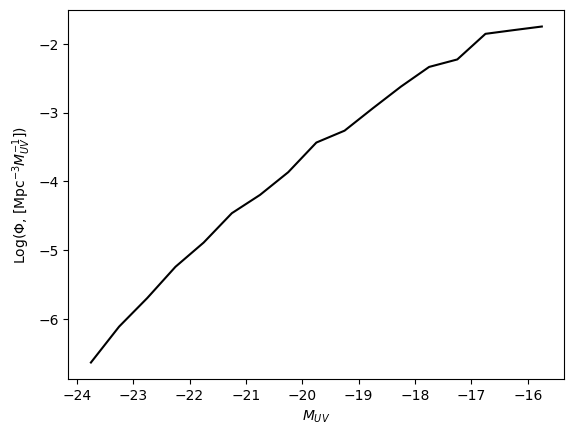

In [22]:
plt.plot(data[0], np.log10(data[1]), color="black")
plt.xlabel(r'$M_{UV}$') 
plt.ylabel(r"Log($\Phi$, $[{\rm Mpc}^{-3}M_{UV}^{-1}]$)")

In [9]:
V150W

,binzz,Sum
0,"(-24, -23]",5.396160e-07
1,"(-23, -22]",4.325090e-06
2,"(-22, -21]",2.289844e-05
3,"(-21, -20]",1.005990e-04
4,"(-20, -19]",4.622181e-04
5,"(-19, -18]",1.761563e-03
6,"(-18, -17]",5.711208e-03


In [11]:
V200W

,binzz,Sum
0,"(-24, -23]",2.549209e-07
1,"(-23, -22]",2.122269e-06
2,"(-22, -21]",1.257527e-05
3,"(-21, -20]",5.993245e-05
4,"(-20, -19]",2.693356e-04
5,"(-19, -18]",9.335554e-04
6,"(-18, -17]",3.287606e-03


In [17]:
Magnitude

array([-24, -23, -22, -21, -20, -19, -18, -17])

In [24]:
Magnitude1

[-23.5, -22.5, -21.5, -20.5, -19.5, -18.5, -17.5, -16.5]

In [6]:
data=np.load('binned_uvlf_data.npy')

In [3]:
import numpy as np

In [5]:
pwd

'C:\\Users\\jdpul\\OneDrive\\Desktop\\Galac\\galacticus-master'

In [7]:
data

array([[-2.37500000e+01, -2.32500000e+01, -2.27500000e+01,
        -2.22500000e+01, -2.17500000e+01, -2.12500000e+01,
        -2.07500000e+01, -2.02500000e+01, -1.97500000e+01,
        -1.92500000e+01, -1.87500000e+01, -1.82500000e+01,
        -1.77500000e+01, -1.72500000e+01, -1.67500000e+01,
        -1.62500000e+01, -1.57500000e+01],
       [ 2.31042830e-07,  7.69417533e-07,  2.00627385e-06,
         5.71193948e-06,  1.28555973e-05,  3.43820063e-05,
         6.34917585e-05,  1.35747206e-04,  3.66937591e-04,
         5.46125891e-04,  1.15389868e-03,  2.38946098e-03,
         4.62127920e-03,  5.93881598e-03,  1.40087629e-02,
         1.58665051e-02,  1.78964643e-02]])

In [19]:
data[1]

array([2.31042830e-07, 7.69417533e-07, 2.00627385e-06, 5.71193948e-06,
       1.28555973e-05, 3.43820063e-05, 6.34917585e-05, 1.35747206e-04,
       3.66937591e-04, 5.46125891e-04, 1.15389868e-03, 2.38946098e-03,
       4.62127920e-03, 5.93881598e-03, 1.40087629e-02, 1.58665051e-02,
       1.78964643e-02])

In [30]:
Mag=np.arange(-24, -15, 0.5)

In [31]:
Mag

array([-24. , -23.5, -23. , -22.5, -22. , -21.5, -21. , -20.5, -20. ,
       -19.5, -19. , -18.5, -18. , -17.5, -17. , -16.5, -16. , -15.5])

In [ ]:
Mag1=[-24.75, -23.25, -22.75, -22.25, -21.75, 20